------------------------------------------------------------------------------------------------------------------------------------------------------

## PURITY NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()
# from scipy.ndimage.interpolation import shift

Welcome to JupyROOT 6.28/00
You have latex installed!. Applying default configuration (tex=True)


In [109]:
info = read_input_file("SBND_XA_VIS_day2")

runs = np.asarray(info["ALPHA_RUNS"]).astype(int)
chs = np.asarray(info["CHAN_TOTAL"]).astype(int)

my_runs = load_npy(runs,chs,preset="EVA",info=info,compressed=True)  # Select runs to be deconvolved (tipichaly alpha)



dict_keys(['DAQ', 'MODEL', 'BITS', 'DYNAMIC_RANGE', 'SAMPLING', 'RAW_DATA', 'PATH', 'MONTH', 'OV_LABEL', 'MUONS_RUNS', 'LIGHT_RUNS', 'ALPHA_RUNS', 'CALIB_RUNS', 'CHAN_LABEL', 'CHAN_TOTAL', 'CHAN_POLAR', 'CHAN_AMPLI', 'LOAD_PRESET', 'SAVE_PRESET', 'TYPE', 'REF', 'I_RANGE', 'F_RANGE'])


-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!

-> DONE!



In [110]:
parameters = {
"sigma":    1e-8,
"a_fast":   1e-8,
"a_slow":   1e-7,
"tau_slow": 0.2e-6}
ranges = [50, 250]
out, potp = fit_wvfs(my_runs,"Scint",thrld=1e-6,fit_range=[ranges[0],ranges[1]],i_param=parameters,in_key=["GaussAveWvf"],
                     OPT={"SHOW": False, "TERMINAL_OUTPUT": True})
# print(out)
# print(potp)


--- FISRT FIT VALUES (FAST) ---
TIME:	3.84E-06	2.45E-10
SIGM:	1.54E-08	1.56E-10
AMP1:	1.17E-08	4.66E-11
TAU1:	1.27E-08	3.69E-10
-------------------------------
Fitting wvf 0 for run 29, ch 0

---------- TOTAL FIT ----------
PED:	2.73E-05	3.84E-05
T0:	3.84E-06	2.45E-10
SIG1:	1.54E-08	1.56E-10
AMP1:	1.32E-08	1.06E-09
TAU1:	1.17E-08	4.66E-11
SIG2:	3.71E-11	3.34E-05
AMP2:	1.06E-09	5.68E-11
TAU2:	2.31E-07	6.42E-09
--------------------------------


--- FISRT FIT VALUES (FAST) ---
TIME:	3.84E-06	2.46E-10
SIGM:	1.54E-08	1.58E-10
AMP1:	1.17E-08	4.74E-11
TAU1:	1.29E-08	3.72E-10
-------------------------------
Fitting wvf 0 for run 29, ch 1

---------- TOTAL FIT ----------
PED:	2.80E-05	3.76E-05
T0:	3.84E-06	2.46E-10
SIG1:	1.54E-08	1.58E-10
AMP1:	1.31E-08	1.76E-09
TAU1:	1.17E-08	4.74E-11
SIG2:	8.85E-12	6.25E-05
AMP2:	1.08E-09	9.25E-11
TAU2:	2.19E-07	9.81E-09
--------------------------------


--- FISRT FIT VALUES (FAST) ---
TIME:	3.84E-06	2.27E-10
SIGM:	1.55E-08	1.44E-10
AMP1:	1.17E-08	4.27E-11

/home/andres/CYTHON_TOOLS/notebooks/../lib/fit_functions.py:56: RuntimeWarning:

invalid value encountered in log



In [111]:
keys = ["GaussAveWvf","FitScint"]
time = []
wvfs = []
pd_runs = []
pd_chs = []
pd_keys = []
for run, ch, key in product(runs, chs, keys):
    time = np.append(time,my_runs[run][ch]["Sampling"]*np.arange(len(my_runs[run][ch][key][0])))
    wvfs = np.append(wvfs,my_runs[run][ch][key][0])
    pd_runs = np.append(pd_runs,len(my_runs[run][ch][key][0])*[run])
    pd_chs = np.append(pd_chs,len(my_runs[run][ch][key][0])*[ch])
    pd_keys = np.append(pd_keys,len(my_runs[run][ch][key][0])*[key])

In [112]:
df = pd.DataFrame({"TIME":time,"WVF":wvfs,"RUNS":pd_runs,"CHANNELS":pd_chs,"KEYS":pd_keys})
fig = px.line(df, x="TIME", y="WVF", facet_row="RUNS", facet_col="CHANNELS", color="KEYS", log_y=True, height=1000,template="presentation")
fit_range_idx = np.argmax(my_runs[runs[0]][chs[0]]["GaussAveWvf"][0])+ranges[1]
fig.add_vline(x= fit_range_idx*my_runs[runs[0]][chs[0]]["Sampling"], line_width=2, line_dash="dash", line_color="salmon")
fig.show()

    Run  Ch           Tau     PE
0     6   0  6.620000e-07  15.40
1     6   1  6.510000e-07  15.70
2     6   3  6.330000e-07  13.00
3     6   4  6.290000e-07  14.20
4     9   0  6.300000e-07  15.40
5     9   1  6.420000e-07  15.60
6     9   3  6.240000e-07  13.20
7     9   4  6.290000e-07  14.40
8    12   0  5.840000e-07  15.07
9    12   1  5.610000e-07  15.35
10   12   3  5.610000e-07  12.80
11   12   4  5.480000e-07  13.87


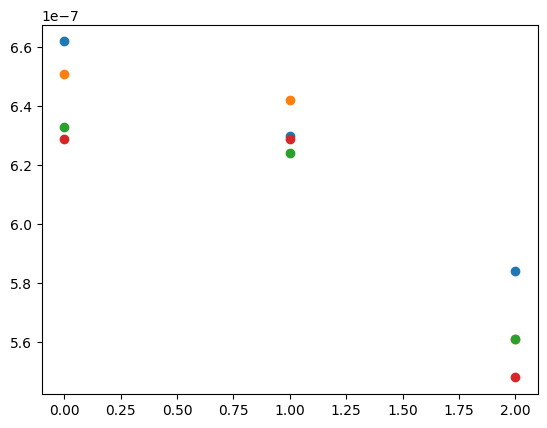

In [14]:
data = pd.read_csv("../fit_data/taus.txt",header = 0, sep = "\t")
print(data)
tau_ch0 = data["Tau"][data["Ch"]==0]
tau_ch1 = data["Tau"][data["Ch"]==1]
tau_ch3 = data["Tau"][data["Ch"]==3]
tau_ch4 = data["Tau"][data["Ch"]==4]
time = range(0,len(tau_ch0))
plt.scatter(time, [tau_ch0])
plt.scatter(time, [tau_ch1])
plt.scatter(time, [tau_ch3])
plt.scatter(time, [tau_ch4])
plt.show()